In [1]:
bersatulawancovid = ['cuci tangan', 'pakai masker', 'jaga jarak']
print(bersatulawancovid)

['cuci tangan', 'pakai masker', 'jaga jarak']


In [2]:
import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

In [3]:
print(resp)

<Response [200]>


In [4]:
print(resp.headers)

{'Server': 'nginx', 'Date': 'Sun, 18 Dec 2022 11:57:44 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Sun, 18 Dec 2022 11:54:05 GMT', 'ETag': 'W/"639eff5d-60d7c"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [5]:
cov_id_raw  = resp.json()

In [6]:
print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [7]:
print('Tanggal pembaharuan data penambahan kasus :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini:', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus : 2022-12-18
Jumlah penambahan kasus sembuh : 2035
Jumlah penambahan kasus meninggal : 14
Jumlah total kasus positif hingga saat ini : 6709597
Jumlah total kasus meninggal hingga saat ini: 160398


In [8]:
import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [9]:
print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat : 1179690
Persentase kematian akibat COVID-19 di Jawa Barat : 1.353067.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.100857.2%


In [10]:
import numpy as np
import pandas as pd
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       942 non-null    int64
 1   KASUS                         942 non-null    int64
 2   MENINGGAL                     942 non-null    int64
 3   SEMBUH                        942 non-null    int64
 4   DIRAWAT_OR_ISOLASI            942 non-null    int64
 5   AKUMULASI_KASUS               942 non-null    int64
 6   AKUMULASI_SEMBUH              942 non-null    int64
 7   AKUMULASI_MENINGGAL           942 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  942 non-null    int64
dtypes: int64(9)
memory usage: 66.4 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

In [11]:
cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
																if item.startswith('AKUMULASI')
																or item.startswith('DIRAWAT')])
												.rename(columns=str.lower)
												.rename(columns={'kasus': 'kasus_baru'})
				  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())


Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


<Figure size 432x288 with 0 Axes>

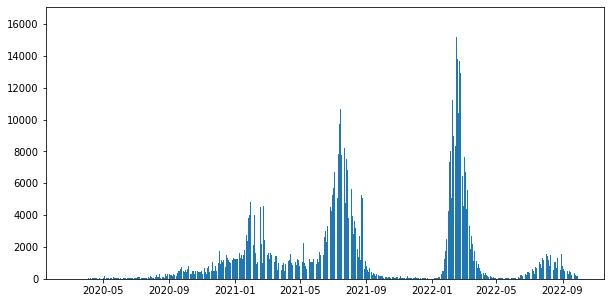

In [12]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

<Figure size 432x288 with 0 Axes>

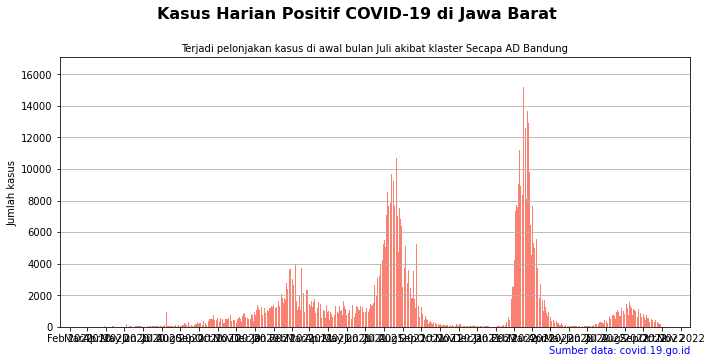

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan Juli akibat klaster Secapa AD Bandung',
fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

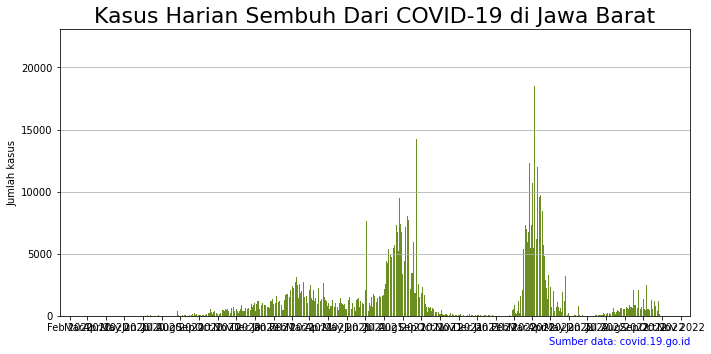

In [14]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 432x288 with 0 Axes>

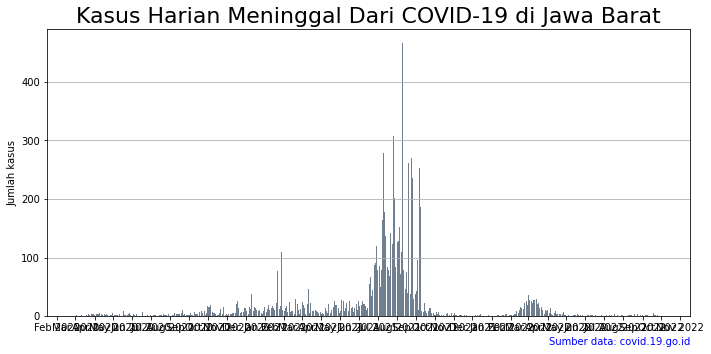

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
					  .resample('W')
					  .sum()
					  .reset_index()
					  .rename(columns={'kasus_baru': 'jumlah'})
)
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     135 non-null    int64
 1   pekan_ke  135 non-null    int64
 2   jumlah    135 non-null    int64
dtypes: int64(3)
memory usage: 3.3 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


In [17]:
cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


C:\Users\Justin Thames\AppData\Local\Temp\ipykernel_10564\3801773798.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)


<Figure size 432x288 with 0 Axes>

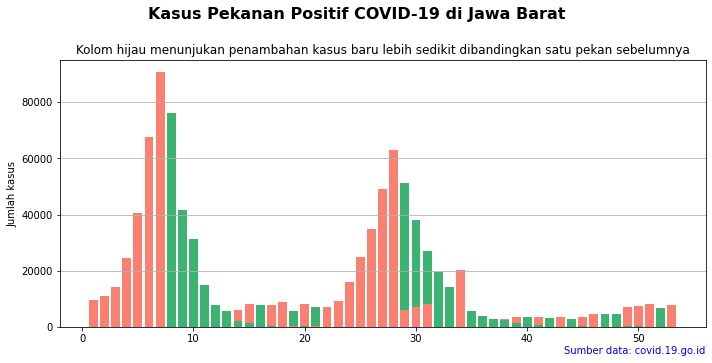

In [18]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_jabar_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
cov_jabar_akumulasi = cov_jabar_tidy[['tanggal']].copy()
cov_jabar_akumulasi['akumulasi_aktif'] = (cov_jabar_tidy['kasus_baru'] - cov_jabar_tidy['sembuh'] - cov_jabar_tidy['meninggal']).cumsum()
cov_jabar_akumulasi['akumulasi_sembuh'] = cov_jabar_tidy['sembuh'].cumsum()
cov_jabar_akumulasi['akumulasi_meninggal'] = cov_jabar_tidy['meninggal'].cumsum()
cov_jabar_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
937,2022-09-26,5731,1156943,15962
938,2022-09-27,5743,1157112,15962
939,2022-09-28,6071,1157156,15962
940,2022-09-29,6191,1157195,15962
941,2022-09-30,6459,1157269,15962


<Figure size 432x288 with 0 Axes>

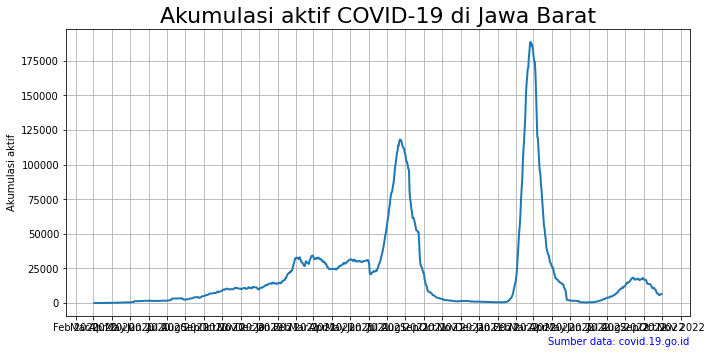

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jabar_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

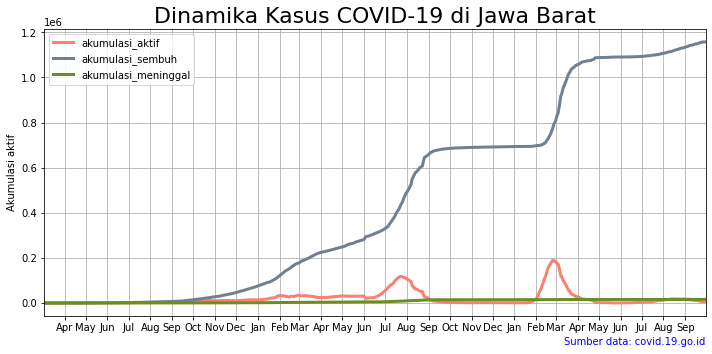

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jabar_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Barat',
fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()